# **Esse Colab seleciona os relâmpagos pontuais (latitude e longitude) da rede EarthNetwork:**
    

1.   Para um Estado: nesse exemplo **MG**
2.   Para uma cidade: nesse exemplo, para **Itajubá**



# **1° Passo:** Instalação de bibliotecas

In [1]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

# Instalando o cartopy (usado para gerar Mapas)
!pip uninstall shapely --yes
!pip install -q shapely cartopy --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
--2023-07-07 14:54:39--  https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6332 (6.2K) [text/plain]
Saving to: ‘cartopy_feature_download.py.1’

cartopy_feature_dow 100%[===================>]   6.18K  --.-KB/s    in 0.001s  

2023-07-07 14:54:39 (9.65 MB/s) - ‘cartopy_feature_download.py.1’ saved [6332/6332]

Feature physical, coastline, 110m length: 134
Feature physical, coastline, 50m length: 1428
Feature physical, coastline, 10m length: 4133
Feature physical, land, 110m length: 127
Feature physical, land, 50m length: 1420
Feature physical, land, 10m length: 

Chegando aqui, será necessário fazer a tediosa **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [2]:
# GeoPandas (usado para trabalhar com GeoDataFrames)
!pip install geopandas

# **2° Passo:** Importação de bibliotecas

In [18]:
from shapely.geometry import Point, Polygon, LineString
import geopandas as gpd
import pandas as pd
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import proplot as pplt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings("ignore")

# **3° Passo:** Monta drive

In [6]:
# montando o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Define caminho do drive

In [7]:
# caminho da pasta do código
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/00c_CODIGOS_EXTRAS_PYTHON/'

#**PARTE 1:** Indique aqui o `Estado` e `Cidade` para a seleção dos relâmpagos

In [31]:
# Indique a sigla do Estado
estado = 'MG'

# Indique a Cidade
cidade = 'Itajubá'

#**PARTE 2:** Lendo arquivo da Brasildat

**Leitura do arquivo de relâmpagos**

In [25]:
df_raios = pd.read_csv(f'{dir}input/pulse_CEMADEN_2016-12-18.txt', delimiter='\s+')
df_raios

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult
0,99999999,IC,2016,12,18,0,0,11.555,-26.727706,-52.743418,-5738,16763,5,2
1,99999999,CG,2016,12,18,0,0,11.593,-26.750973,-52.744636,-21903,0,8,2
2,99999999,IC,2016,12,18,0,0,32.662,-26.738673,-52.569796,-8876,16206,7,1
3,99999999,IC,2016,12,18,0,0,37.053,-21.945242,-53.847038,11103,16069,8,2
4,99999999,IC,2016,12,18,0,0,37.063,-21.941922,-53.849979,12624,19112,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75024,99999999,IC,2016,12,18,23,59,58.478,-22.304956,-46.052855,-5551,11725,8,1
75025,99999999,IC,2016,12,18,23,59,58.902,-29.241452,-56.513615,6331,15391,5,1
75026,99999999,CG,2016,12,18,23,59,58.924,-27.673718,-60.966353,-16630,0,5,1
75027,99999999,CG,2016,12,18,23,59,59.260,-26.224939,-62.716808,-18684,0,10,2


#**PARTE 3:** Leitura do shapefile

**Baixando os shapefiles**

In [32]:
# Baixando os arquivos de shapefile dos Estados brasileiros
print(' -->>>>>>> Baixando shapefile dos Estados do Brasil -->>>>>>>', '\n')
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip -o br_unidades_da_federacao.zip
print('\n')

# Baixando os arquivos de shapefile das Cidades do Estado de MG
print(' -->>>>>>> Baixando shapefile das cidades de MG -->>>>>>>', '\n')
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/MG/mg_municipios.zip
!unzip -o mg_municipios.zip
print('\n')

 -->>>>>>> Baixando shapefile dos Estados do Brasil -->>>>>>> 

--2023-07-07 15:03:23--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


 -->>>>>>> Baixando shapefile das cidades de MG -->>>>>>> 

--2023-07-07 15:03:24--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/MG/mg_municipios.zip
Resolving geoftp.ibge.gov.br 

**Lendo os shapefiles**

In [33]:
# Shapefile das Cidades de MG
MG_cidades = gpd.read_file(f'/content/{estado}_Municipios_2019.shp')

# Shapefile dos Estados do Brasil
BRASIL_estados = gpd.read_file('/content/BR_UF_2019.shp')

#**PARTE 4:** PARA O ESTADO DE MG

## **Gera o GeoDataFrame**

In [13]:
# Cria o GeoDataframe de raios
raios = zip(df_raios['lon'], df_raios['lat'])                                         # Variavel "raios' para jogarmos no loop de leitura
geometry = [Point(raios) for raios in zip(df_raios['lon'], df_raios['lat']) ]         # Configura/Ajeita a geometria dos pontos
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_df_raios = gpd.GeoDataFrame(df_raios, crs=crs, geometry=geometry)                 # GeoDataFrame de Raios

# Converte o Crs de MG - Aqui deixa o CRS do dado e do shape igual
BRASIL_estados = BRASIL_estados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units =km +no_defs')
geo_df_raios = geo_df_raios.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Elimina dados fora do Estado de MG
ind = BRASIL_estados[ BRASIL_estados['SIGLA_UF'] == estado].index
indice = ind[0]

geo_df_raios = geo_df_raios[ geo_df_raios['geometry'].within(BRASIL_estados.iloc[indice].geometry) ]
geo_df_raios

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult,geometry
36,99999999,CG,2016,12,18,0,3,14.931,-19.682740,-43.215025,34063,0,10,1,POINT (687.113 7822.644)
97,99999999,IC,2016,12,18,0,7,11.136,-20.263744,-43.299950,5274,15908,7,1,POINT (677.556 7758.420)
101,99999999,IC,2016,12,18,0,7,18.328,-19.695499,-43.224257,-25215,17094,10,2,POINT (686.130 7821.242)
102,99999999,CG,2016,12,18,0,7,18.357,-19.719235,-43.247367,-18521,0,8,2,POINT (683.680 7818.640)
129,99999999,IC,2016,12,18,0,8,58.681,-20.263284,-43.332389,-7405,19610,11,1,POINT (674.168 7758.505)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74951,99999999,IC,2016,12,18,23,59,13.817,-22.389366,-45.997206,-4238,13821,8,2,POINT (397.347 7523.734)
74952,99999999,IC,2016,12,18,23,59,14.094,-22.378340,-45.981407,-4488,8959,6,2,POINT (398.966 7524.966)
74954,99999999,IC,2016,12,18,23,59,14.530,-22.446494,-45.854805,-2086,17509,5,1,POINT (412.043 7517.501)
75017,99999999,IC,2016,12,18,23,59,53.739,-22.411117,-46.066119,-8434,14676,11,1,POINT (390.270 7521.278)


In [14]:
BRASIL_estados

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-1776.271 8771.454, -1776.150 8772.0..."
1,12,Acre,AC,Norte,"POLYGON ((-2457.706 8792.372, -2457.755 8792.3..."
2,13,Amazonas,AM,Norte,"POLYGON ((-2348.650 9550.791, -2347.407 9558.8..."
3,14,Roraima,RR,Norte,"POLYGON ((-1647.512 10289.132, -1647.550 10289..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-217.268 9947.348, -216.934 99..."
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-106.973 10234.201, -106.642 1..."
6,17,Tocantins,TO,Norte,"POLYGON ((142.135 9341.703, 142.299 9342.540, ..."
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((551.344 9776.584, 551.442 9776..."
8,22,Piauí,PI,Nordeste,"POLYGON ((730.466 9264.891, 730.350 9265.120, ..."
9,23,Ceará,CE,Nordeste,"POLYGON ((924.022 9554.896, 923.732 9554.980, ..."


In [15]:
BRASIL_estados[ BRASIL_estados['SIGLA_UF'] == estado]

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
16,31,Minas Gerais,MG,Sudeste,"POLYGON ((-104.376 7865.521, -104.430 7866.126..."


<AxesSubplot:>

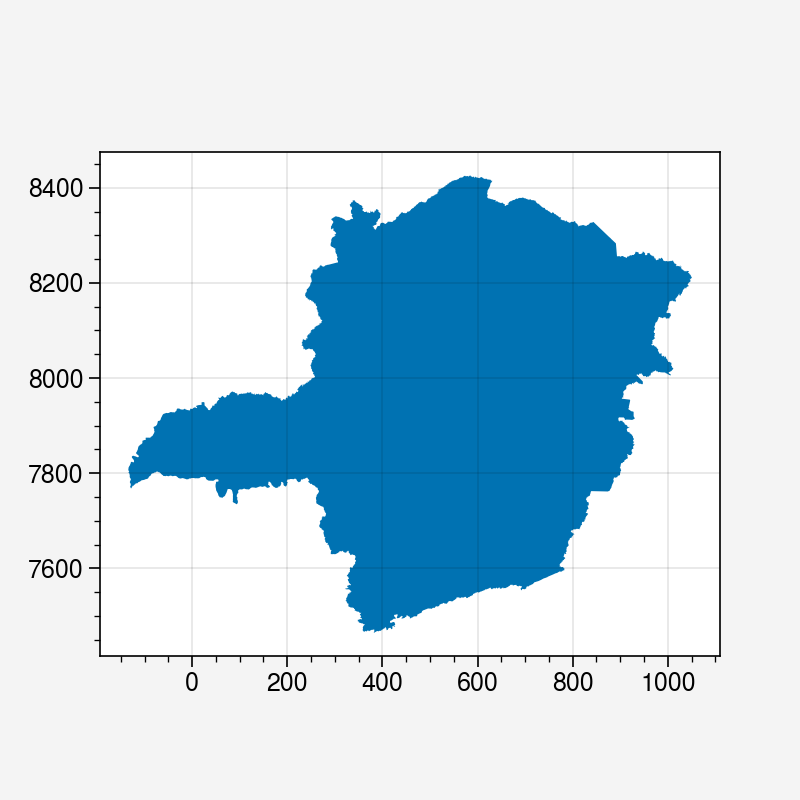

In [16]:
BRASIL_estados[ BRASIL_estados['SIGLA_UF'] == estado].plot()

## **Plota relâmpagos selecionados**

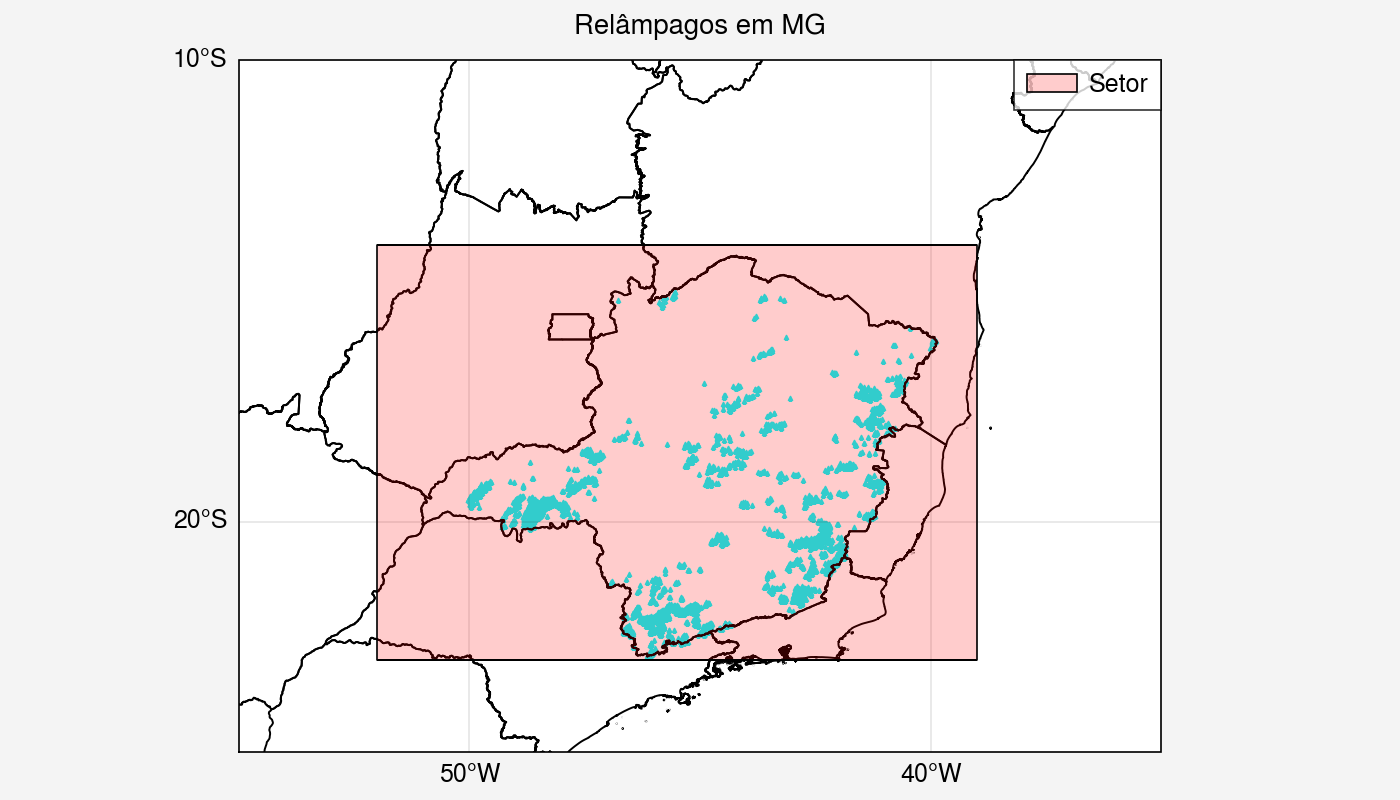

In [19]:
# extensão da figura
lonmin, lonmax, latmin, latmax = -55., -35, -25, -10

# lats e lons da região de estudo
lonmin_regiao, lonmax_regiao, latmin_regiao, latmax_regiao = -52., -39., -23., -14.

# moldura da figura
fig, ax = pplt.subplots(figsize=(7, 4), tight=True, proj='pcarree',)

# fomatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=10, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title='Relâmpagos em MG')

# Plota quadrado região de estudo
ax.fill_between((lonmin_regiao, lonmax_regiao), *(latmin_regiao, latmax_regiao), zorder=3, edgecolor='black',
                facecolor=pplt.set_alpha('red', 0.2), label='Setor')

# plota relâmpagos
ax.scatter(geo_df_raios['lon'].values,
           geo_df_raios['lat'].values,
           transform=ccrs.PlateCarree(),
           marker='^',
           s=2,
           color='cyan')

# Adiciona legenda
ax.legend(ncol=1)

# Adiciona shapeFile dos Estados
shapefile = list(shpreader.Reader('/content/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.7)

# Salva figura
fig.save('raios_mg.png', bbox_inches='tight')

# Exibe na tela
pplt.show()

#**PARTE 5:** PARA CIDADE DE ITAJUBÁ

## **Gera o GeoDataFrame**

In [34]:
# Cria o GeoDataframe de raios
raios = zip(df_raios['lon'], df_raios['lat'])                                         # Variavel "raios' para jogarmos no loop de leitura
geometry = [Point(raios) for raios in zip(df_raios['lon'], df_raios['lat']) ]         # Configura/Ajeita a geometria dos pontos
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_df_raios = gpd.GeoDataFrame(df_raios, crs=crs, geometry=geometry)                 # GeoDataFrame de Raios

# Converte o Crs de MG - Aqui deixa o CRS do dado e do shape igual
MG_cidades = MG_cidades.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units =km +no_defs')
geo_df_raios = geo_df_raios.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Elimina dados fora da cidade
ind = MG_cidades[ MG_cidades['NM_MUN'] == cidade].index
indice = ind[0]

geo_df_raios = geo_df_raios[ geo_df_raios['geometry'].within(MG_cidades.iloc[indice].geometry) ]
geo_df_raios

,id,tipo,ano,mes,dia,hor,min,seg,lat,lon,pc(A),alt_ic(m),sens,mult,geometry
40853,99999999,IC,2016,12,18,18,37,42.346,-22.474281,-45.374961,-4834,15490,7,1,POINT (461.426 7514.627)
42028,99999999,IC,2016,12,18,18,47,42.164,-22.509554,-45.400206,-14765,17714,11,1,POINT (458.839 7510.716)


In [35]:
MG_cidades

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3100104,Abadia dos Dourados,MG,881.064,"POLYGON ((223.213 7973.776, 222.912 7973.827, ..."
1,3100203,Abaeté,MG,1817.067,"POLYGON ((485.789 7911.579, 485.845 7911.571, ..."
2,3100302,Abre Campo,MG,470.551,"POLYGON ((767.753 7765.104, 767.753 7765.121, ..."
3,3100401,Acaiaca,MG,101.886,"POLYGON ((695.900 7739.425, 695.891 7739.433, ..."
4,3100500,Açucena,MG,815.422,"POLYGON ((775.705 7905.153, 775.749 7905.175, ..."
...,...,...,...,...,...
848,3171808,Virginópolis,MG,439.878,"POLYGON ((736.072 7919.842, 736.068 7919.861, ..."
849,3171907,Virgolândia,MG,281.022,"POLYGON ((778.237 7951.062, 778.227 7951.059, ..."
850,3172004,Visconde do Rio Branco,MG,243.351,"POLYGON ((713.667 7678.710, 713.662 7678.717, ..."
851,3172103,Volta Grande,MG,205.552,"POLYGON ((742.855 7590.752, 742.850 7590.764, ..."


In [36]:
MG_cidades [ MG_cidades['NM_MUN'] == cidade]

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
367,3132404,Itajubá,MG,294.835,"POLYGON ((446.887 7518.779, 446.883 7518.796, ..."


<AxesSubplot:>

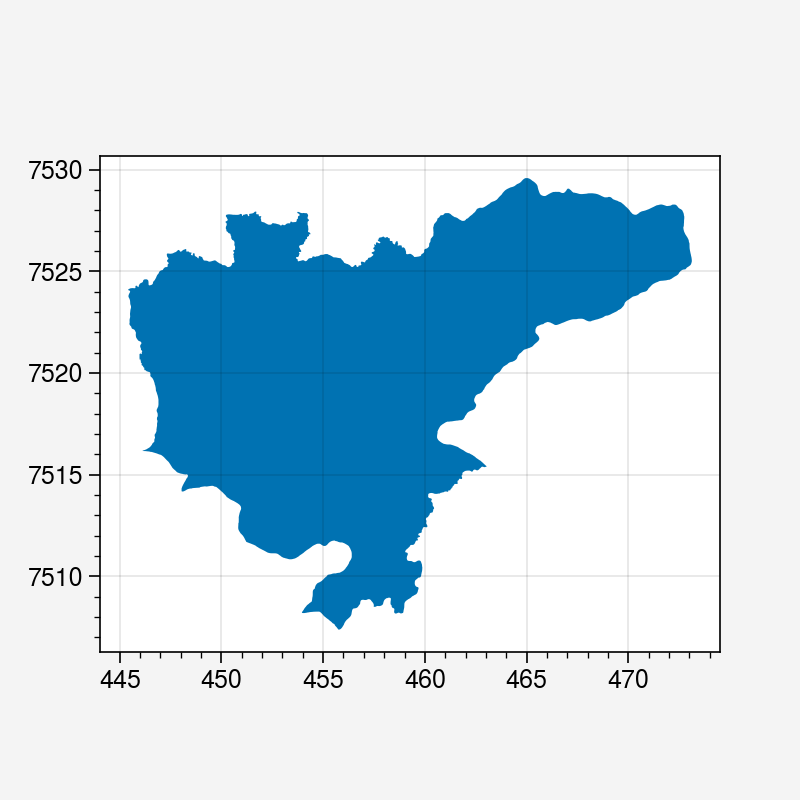

In [37]:
MG_cidades [ MG_cidades['NM_MUN'] == cidade].plot()

## **Plota relâmpagos selecionados**

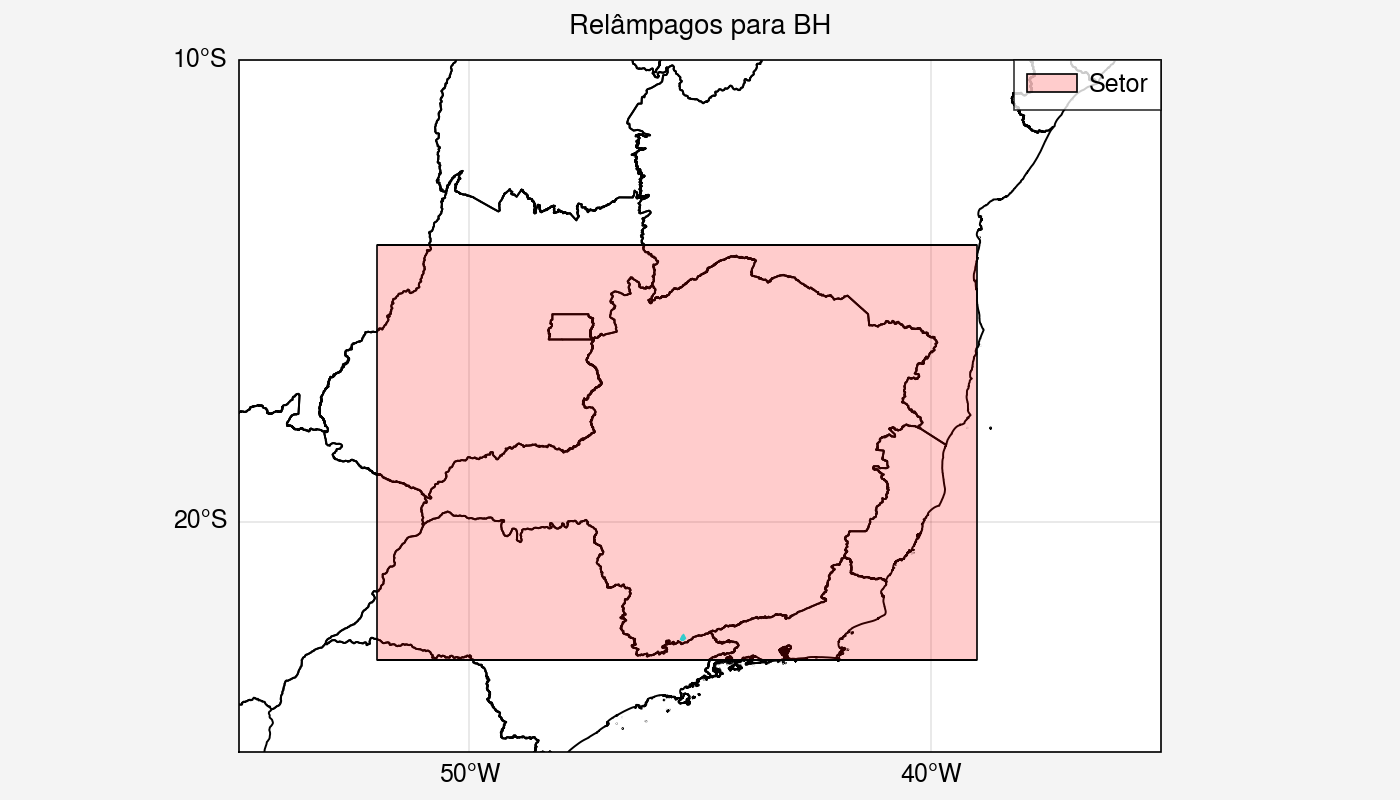

In [38]:
# extensão da figura
lonmin, lonmax, latmin, latmax = -55., -35, -25, -10

# lats e lons da região de estudo
lonmin_regiao, lonmax_regiao, latmin_regiao, latmax_regiao = -52., -39., -23., -14.

# moldura da figura
fig, ax = pplt.subplots(figsize=(7, 4), tight=True, proj='pcarree',)

# fomatação dos eixos da figura
ax.format(coast=False,
          borders=False,
          innerborders=False,
          labels=True,
          latlines=10,
          lonlines=10,
          latlim=(latmin, latmax),
          lonlim=(lonmin, lonmax),
          title='Relâmpagos para BH')

# Plota quadrado região de estudo
ax.fill_between((lonmin_regiao, lonmax_regiao), *(latmin_regiao, latmax_regiao), zorder=3, edgecolor='black',
                facecolor=pplt.set_alpha('red', 0.2), label='Setor')

# plota relâmpagos
ax.scatter(geo_df_raios['lon'].values,
           geo_df_raios['lat'].values,
           transform=ccrs.PlateCarree(),
           marker='^',
           s=2,
           color='cyan')

# Adiciona legenda
ax.legend(ncol=1)

# Adiciona shapeFile dos Estados
shapefile = list(shpreader.Reader('/content/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.7)

# Salva figura
fig.save('raios_itajuba.png', bbox_inches='tight')

# Exibe na tela
pplt.show()